Linear Model Coefficients: θ0=[6.77889969e-05], θ1=3.749049427376911


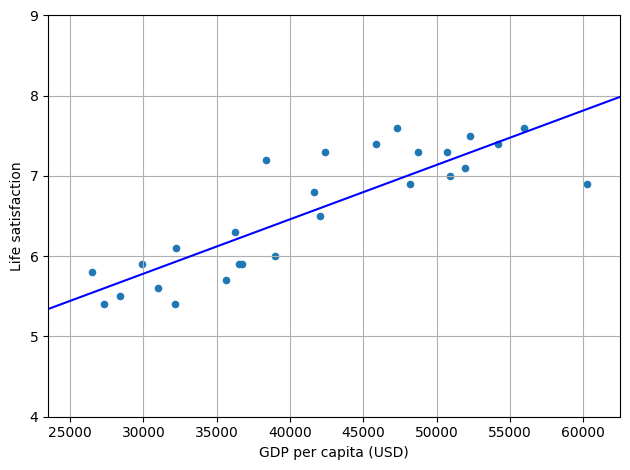

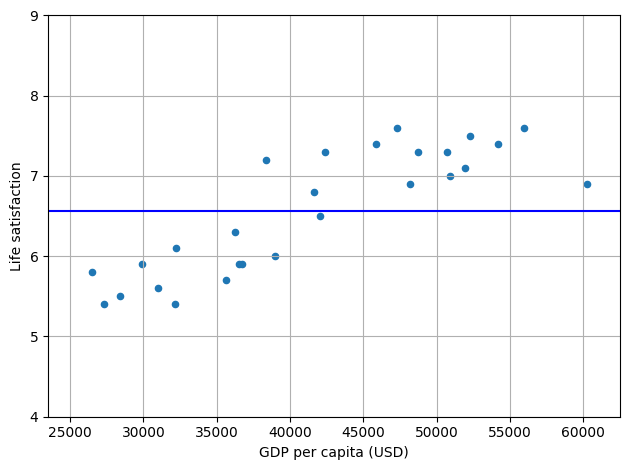

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from pathlib import Path
import urllib.request
# Constants for data plotting
MIN_VALUE, MAX_VALUE = 0, 100  # Placeholder values, modify as needed for each dataset
MIN_LIFE_SAT, MAX_LIFE_SAT = 0, 10  # Placeholder for Life Satisfaction range

# Data Handling Class
class DataHandler:
    def __init__(self, dataset_urls, target_column):
        """
        Initialize the DataHandler.

        :param dataset_urls: List of URLs to download datasets from.
        :param target_column: The column name of the target variable.
        """
        self.dataset_urls = dataset_urls
        self.target_column = target_column
        self.data = None

    def download_datasets(self):
        """Download the datasets from the specified URLs."""
        datapath = Path("datasets")
        datapath.mkdir(parents=True, exist_ok=True)

        for url in self.dataset_urls:
            filename = url.split("/")[-1]
            file_path = datapath / filename
            if not file_path.is_file():
                print(f"Downloading {filename}...")
                urllib.request.urlretrieve(url, file_path)

    def load_and_clean_data(self):
        """Load and clean the datasets."""
        # Load all datasets into a single DataFrame
        dataframes = []
        for url in self.dataset_urls:
            filename = url.split("/")[-1]
            df = pd.read_csv(Path("datasets") / filename)
            dataframes.append(df)

        # Combine DataFrames (assumes all datasets can be concatenated)
        self.data = pd.concat(dataframes, ignore_index=True)
        self.data.dropna(inplace=True)  # Drop missing values for simplicity
        print(f"Data loaded with shape {self.data.shape}")

    def get_features_and_target(self):
        """Extract features and target variable."""
        X = self.data.drop(columns=self.target_column)
        y = self.data[self.target_column]
        return X, y

# Model Class
class Model:
    def __init__(self, model=LinearRegression(), polynomial_degree=None):
        """
        Initialize the model.

        :param model: The regression model to be used.
        :param polynomial_degree: Degree of polynomial features (if applicable).
        """
        self.model = model
        self.pipeline = None

        if polynomial_degree:
            self.pipeline = Pipeline([
                ('polynomial_features', PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', model)
            ])

    def fit(self, X, y):
        """Fit the model to the data."""
        if self.pipeline:
            self.pipeline.fit(X, y)
        else:
            self.model.fit(X, y)
        print("Model training complete.")

    def predict(self, X):
        """Predict using the fitted model."""
        if self.pipeline:
            return self.pipeline.predict(X)
        return self.model.predict(X)

    def evaluate(self, X, y):
        """Evaluate the model and print performance metrics."""
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        print(f"Mean Squared Error: {mse:.2f}")

    def plot_results(self, X, y):
        """Plot the actual vs predicted values."""
        plt.scatter(y, self.predict(X), alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs Predicted Values")
        plt.grid()
        plt.show()

# Main Workflow
def main():
    # Specify dataset URLs and target column
    dataset_urls = [
        "https://github.com/ageron/data/raw/main/lifesat/oecd_bli.csv",
        "https://github.com/ageron/data/raw/main/lifesat/gdp_per_capita.csv"
    ]
    target_column = "Life satisfaction"  # Adjust based on the dataset

    # Initialize DataHandler
    data_handler = DataHandler(dataset_urls, target_column)
    data_handler.download_datasets()
    data_handler.load_and_clean_data()

    # Get features and target
    X, y = data_handler.get_features_and_target()

    # Linear Regression Model
    linear_model = Model(LinearRegression())
    linear_model.fit(X, y)
    linear_model.evaluate(X, y)
    linear_model.plot_results(X, y)

    # Polynomial Regression with Ridge Regularization
    ridge_model = Model(Ridge(alpha=1.0), polynomial_degree=2)
    ridge_model.fit(X, y)
    ridge_model.evaluate(X, y)
    ridge_model.plot_results(X, y)

if __name__ == "__main__":
    main()
